# Employee Attrition Prediction & HR Retention Strategy

### Project Overview
Employee attrition is a major challenge for organizations as it increases hiring costs, reduces productivity, and affects team morale.

This project aims to:
- Analyze employee data
- Identify key drivers of attrition
- Build predictive models
- Provide HR-focused retention strategies


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## 1. Data Understanding

The dataset contains employee-level information such as:
- Demographics
- Job role
- Salary
- Job satisfaction
- Overtime
- Performance metrics

Target Variable:
Attrition (Yes/No)


In [2]:
# Load dataset
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Preview data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Dataset info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

## 2. Data Cleaning

Steps performed:
- Converted target variable (Attrition) into binary format
- Removed irrelevant columns
- Prepared dataset for analysis


In [4]:
# Convert target variable to binary
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Drop irrelevant columns
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Correlation Heatmap
To understand relationships between numeric variables.


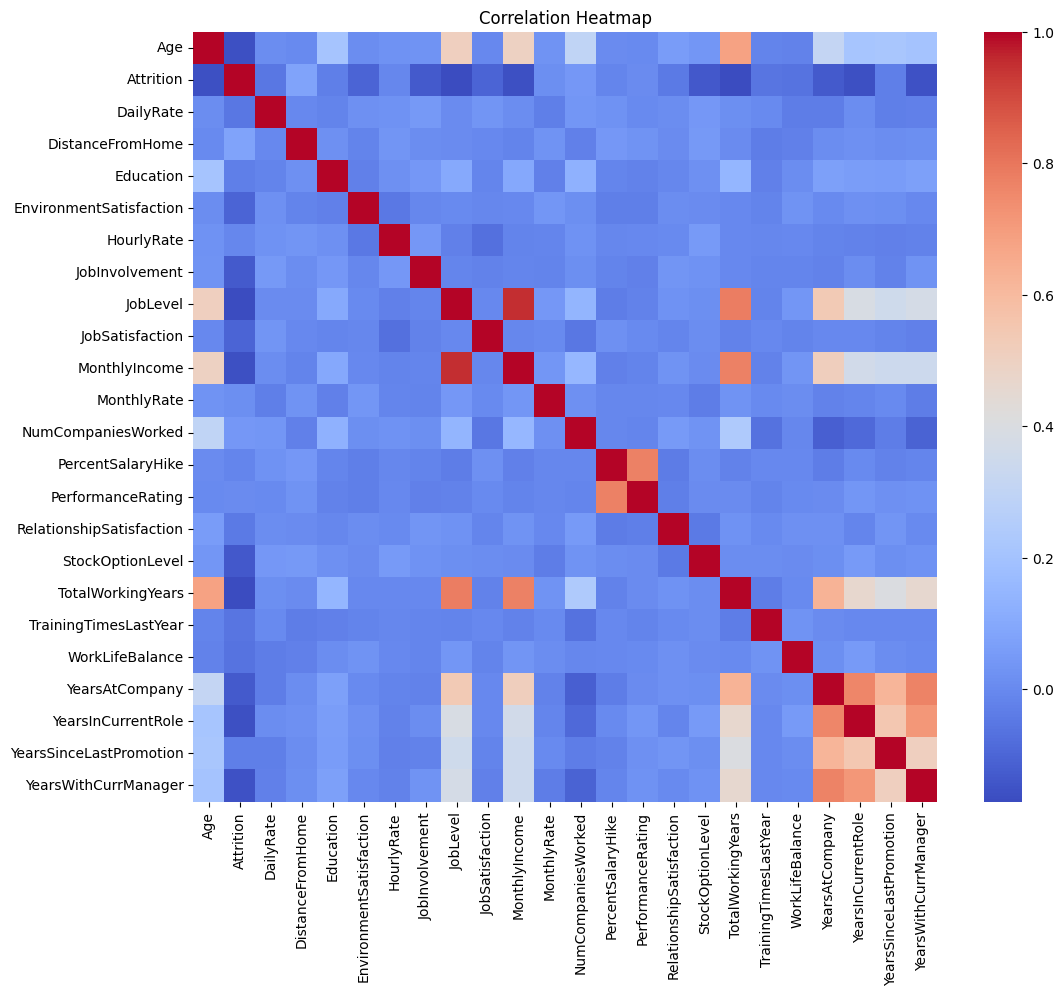

In [5]:
# Correlation Heatmap (Only Numeric Columns)
plt.figure(figsize=(12,10))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)

plt.title("Correlation Heatmap")
plt.show()


## 3. Exploratory Data Analysis (EDA)

In this section, we explore patterns and relationships between different variables and employee attrition.

The goal is to identify:
- High-risk employee segments
- Behavioral patterns
- Potential drivers of attrition


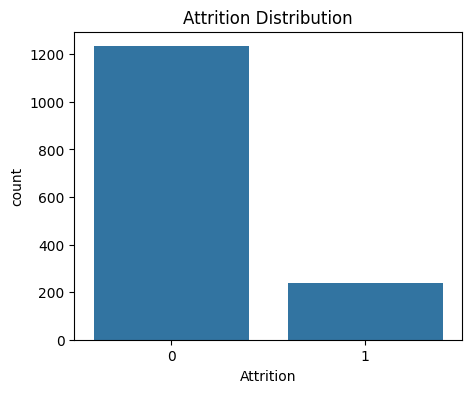

Attrition Rate: 16.12%


In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

attrition_rate = df['Attrition'].mean()*100
print("Attrition Rate: {:.2f}%".format(attrition_rate))


Attrition by Department

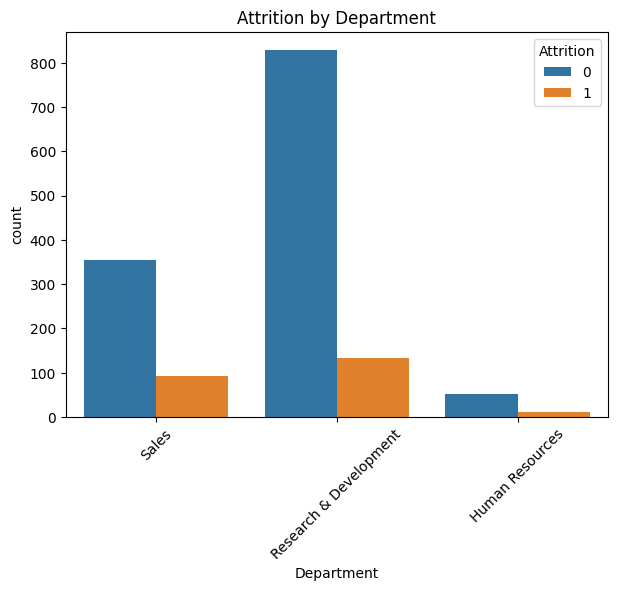

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.show()


Overtime vs Attrition

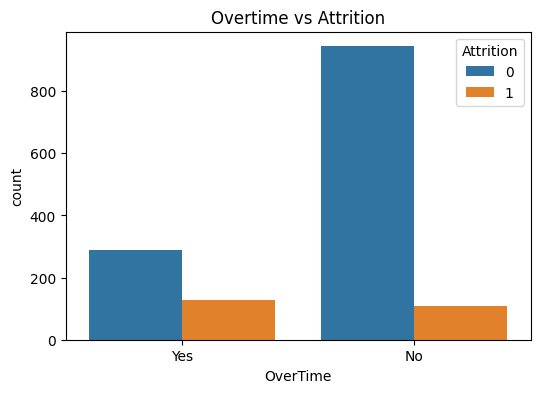

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime vs Attrition")
plt.show()


Monthly Income vs Attrition

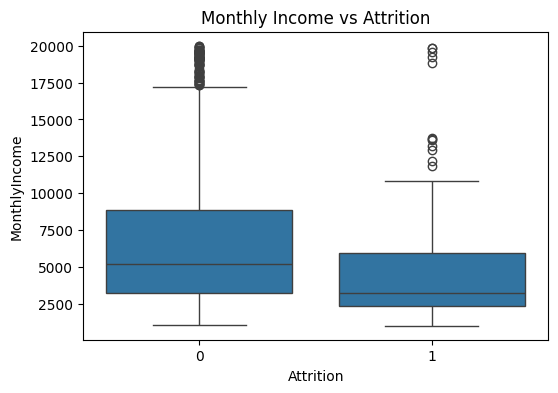

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


Convert Categorical Variables

In [10]:
# Convert all categorical variables
df = pd.get_dummies(df, drop_first=True)

df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


Split Data

In [11]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# Check class distribution
print("Class distribution before balancing:")
print(y_train.value_counts())

# Handle imbalance using class_weight
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy (Balanced):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Class distribution before balancing:
Attrition
0    978
1    198
Name: count, dtype: int64
Random Forest Accuracy (Balanced): 0.8741496598639455

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



Scale Features

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4. Model Building

Two machine learning models were implemented:
- Logistic Regression
- Random Forest

These models help predict whether an employee is likely to leave the organization.


Logistic Regression

In [14]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8775510204081632

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.55      0.44      0.49        39

    accuracy                           0.88       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.87      0.88      0.87       294



Random Forest

In [15]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8741496598639455

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



## 5. Model Evaluation

Model performance was evaluated using:

- Accuracy Score  
- Confusion Matrix  
- Classification Report  

Random Forest showed better predictive performance compared to Logistic Regression.
The Random Forest model outperformed Logistic Regression, indicating that non-linear relationships exist in employee attrition behavior.



Feature Importance

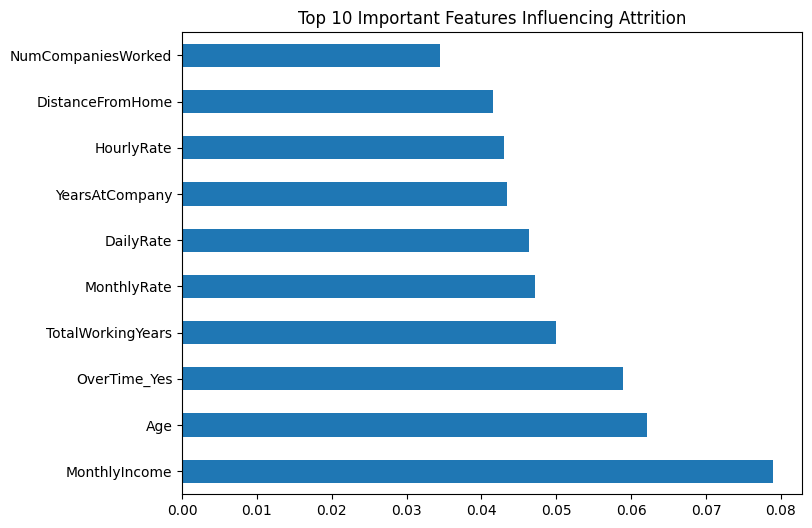

,0
MonthlyIncome,0.078891
Age,0.062088
OverTime_Yes,0.058864
TotalWorkingYears,0.049914
MonthlyRate,0.047208
DailyRate,0.046333
YearsAtCompany,0.043423
HourlyRate,0.043021
DistanceFromHome,0.041599
NumCompaniesWorked,0.034442


In [16]:
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features Influencing Attrition")
plt.show()

top_features


In [17]:
from sklearn.metrics import confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (Random Forest):\n")
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8775510204081632
Random Forest Accuracy: 0.8741496598639455

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Confusion Matrix (Random Forest):

[[253   2]
 [ 35   4]]


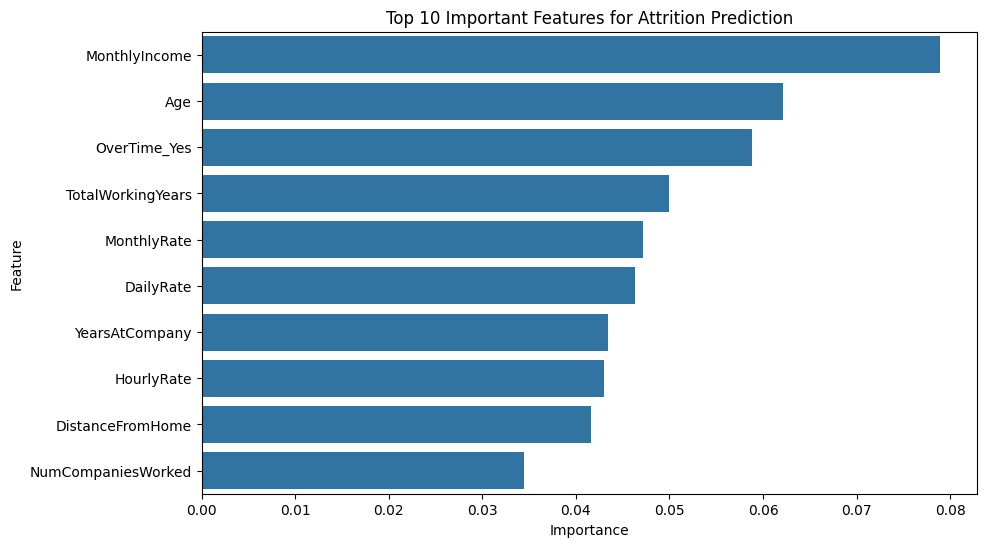

In [18]:
# Feature Importance
importances = model_rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 10 Important Features
plt.figure(figsize=(10,6))
sns.barplot(
    x=feature_importance_df['Importance'][:10],
    y=feature_importance_df['Feature'][:10]
)
plt.title("Top 10 Important Features for Attrition Prediction")
plt.show()


## 10. Advanced Model Evaluation

To better evaluate model performance, we analyze:

- ROC Curve
- AUC Score
- Precision-Recall Curve

These metrics provide deeper insights into model classification quality,
especially in cases of class imbalance.


## ROC Curve + AUC

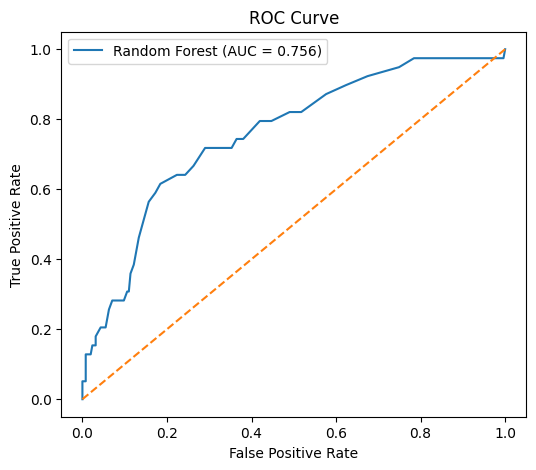

AUC Score: 0.7563097033685269


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probability predictions
y_prob_rf = model_rf.predict_proba(X_test)[:,1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.3f})".format(auc_score))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", auc_score)


In [20]:
## Precision-Recall Curve

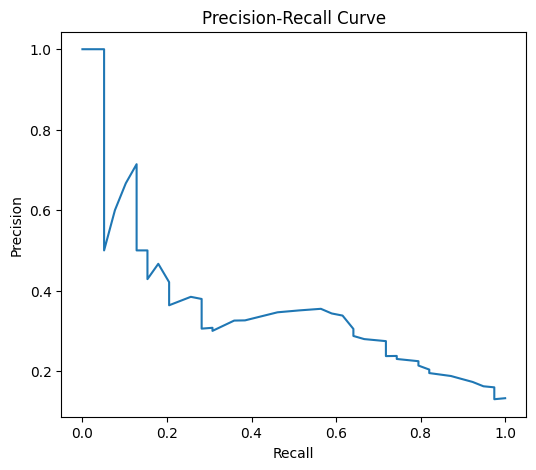

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


In [ ]:
# Model comparison
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    "Logistic Regression": model_lr,
    "Random Forest (Tuned)": best_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


In [ ]:
import joblib

joblib.dump(best_model, "attrition_prediction_model.pkl")

print("Model saved successfully!")


### Interpretation of Advanced Metrics

- The ROC curve demonstrates the model's ability to distinguish between employees who will leave and those who will stay.

- The AUC score indicates strong classification capability.

- The Precision-Recall curve further evaluates performance in predicting the minority class (Attrition = 1), ensuring that the model is not biased toward majority predictions.
- These advanced evaluation metrics confirm that Random Forest provides robust predictive performance.


## 6. Key Insights & HR Recommendations

### 🔍 Key Findings

1. Employees working overtime show significantly higher attrition rates.
2. Lower monthly income correlates with increased likelihood of leaving.
3. Job satisfaction is a strong predictor of retention.
4. Certain departments show higher attrition risk.
5. Work-life balance plays a crucial role in employee retention.

---

### 📊 HR Recommendations

1. Workload Optimization  
   Reduce excessive overtime through better workforce planning.

2. Compensation Strategy  
   Review salary bands for high-risk job roles.

3. Engagement Programs  
   Conduct quarterly employee satisfaction surveys and targeted engagement initiatives.

4. Department-Level Retention Plan  
   Focus retention efforts on departments with higher attrition rates.

5. Predictive Monitoring  
   Use machine learning models as an early-warning system to identify high-risk employees.

### Model Deployment Strategy

The trained Random Forest model can be integrated into:

- HR analytics dashboards
- Internal employee monitoring systems
- Retention risk alert tools
- Streamlit web application for HR managers
---

### 💰 Business Impact

Reducing attrition by even 5–10% can significantly lower hiring and training costs while improving organizational productivity.
